# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('class_keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_df = requests.get(btc_url).json()
btc_price = btc_df['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_df = requests.get(eth_url).json()
eth_price = eth_df['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73767.60
The current value of your 5.3 ETH is $22799.91


In [6]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
five_year = pd.Timestamp("2015-07-14", tz="America/New_York").isoformat()
today= pd.Timestamp("now", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = five_year,
    end = today 
 
).df

# Preview DataFrame
df_portfolio

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300  3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240  3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970  2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995  5842592   
2021-06-16 00:00:00-04:00  115.07  115.1285  114.5100  114.630  7527672   
...                           ...       ...       ...      ...      ...   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.170  7088133   
2021-10-26 00:00:00-04:00  114.25  114.3800  114.1100  114.370  5284755   
2021-10-27 00:00:00-04:00  114.66  114.9150  114.4250  114.770  6817074   
2021-10-28 00:00:00-04:00  114.71  114.8250  114.5700  114.650  4971007   
2021-10-29 00:00:00-04:00  114.35  114.7800  114.3500  114.620  7051614   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-06-10 00:00:00-04:00  422.96  424.63  421.55  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.42  422.82  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.29  423.10  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.46  423.54  424.50  42885806  
2021-06-16 00:00:00-04:00  424.63  424.87  419.92  422.12  73638324  
...                           ...     ...     ...     ...       ...  
2021-10-25 00:00:00-04:00  454.28  455.90  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  457.20  458.49  455.56  455.97  49865704  
2021-10-27 00:00:00-04:00  456.45  457.16  453.86  453.92  48219255  
2021-10-28 00:00:00-04:00  455.46  458.40  455.45  458.27  43081788  
2021-10-29 00:00:00-04:00  455.87  459.56  455.56  459.22  58813207  

[100 rows x 10 columns]

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close']['2021-10-01 00:00:00-04:00'])
spy_close_price = float(df_portfolio['SPY']['close']['2021-10-01 00:00:00-04:00'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.02
Current SPY closing price: $434.19


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21709.50
The current value of your 200 AGG shares is $23004.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
portfolio_amount = {
    'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
}

# Create savings DataFrame
portfolio_mix = ['crypto', 'shares']
df_savings = pd.DataFrame(portfolio_amount, index=portfolio_mix)

# Display savings DataFrame
display(df_savings)

,amount
crypto,96567.511
shares,44713.500


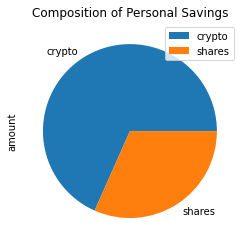

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings');

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value


# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else: print(f'You are {(emergency_fund - total_savings):.2f} away from reaching your goal!')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.6, 0.4]
num_yrs = 30
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [21]:
# Printing the simulation input data
MC_portfolio.portfolio_data.dropna(inplace=True)
MC_portfolio.portfolio_data

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534.0   
...                           ...       ...       ...     ...        ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.50  5160765.0   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.6700  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.4500  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.6300  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.7500  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.4300  236.670   
...                                ...     ...     ...       ...      ...   
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.22  416.8111  417.640   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.480   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.350   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.980   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.300   

                                                     
                                volume daily_return  
time                                                 
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701  
2017-05-18 00:00:00-04:00   82965499.0     0.003477  
...                                ...          ...  
2021-04-26 00:00:00-04:00   44689009.0     0.002208  
2021-04-27 00:00:00-04:00   45962655.0    -0.000383  
2021-04-28 00:00:00-04:00   45533863.0    -0.000311  
2021-04-29 00:00:00-04:00   70595229.0     0.006302  
2021-04-30 00:00:00-04:00   73129109.0    -0.006381  

[998 rows x 12 columns]

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/rinatabitov/Desktop/Financial/-Financial-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003068,1.000199,0.997811,0.997987,0.992734,0.995046,0.999476,1.000530,1.003778,1.008389,...,0.989583,1.001163,1.006739,0.994684,1.004386,1.002176,1.001320,0.998773,0.998384,1.014066
2,1.007864,0.996222,1.003565,0.994562,0.994119,0.992966,0.996373,1.004260,1.004777,1.010894,...,0.984068,1.002942,1.004606,0.994369,0.993372,1.003273,1.000210,0.996574,0.994554,1.008651
3,1.008510,0.991870,1.008723,0.993165,0.988834,0.991201,0.990291,1.009493,0.998655,1.004841,...,0.981761,1.003259,1.012574,0.993232,0.988711,1.001308,0.999012,0.994257,0.990234,1.001528
4,1.014367,0.997789,1.000994,0.994444,0.989550,0.992488,0.991223,1.020478,0.998291,1.004291,...,0.983139,1.007432,1.012079,0.997213,0.991095,0.990364,0.996906,0.995329,0.973183,1.005584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.462009,7.736140,4.667761,15.772344,5.233433,6.693778,6.913147,2.476751,5.961458,2.125501,...,11.953292,9.444585,15.930028,16.086162,14.718668,15.316902,9.490560,15.436771,16.482763,11.675734
7557,7.468565,7.718279,4.636665,15.630920,5.256007,6.713385,6.909397,2.488732,5.978098,2.137676,...,11.898446,9.435253,15.948649,16.006555,14.684195,15.253357,9.516564,15.563757,16.749024,11.641472
7558,7.458228,7.772261,4.612331,15.639275,5.260172,6.765023,6.900970,2.471901,5.989319,2.141191,...,11.842509,9.426125,16.130117,16.019162,14.684302,15.361631,9.501704,15.590072,16.607077,11.602785
7559,7.551658,7.786292,4.606324,15.740680,5.266189,6.779727,6.877627,2.489569,6.018590,2.141767,...,11.830562,9.454768,16.012624,16.044881,14.679373,15.549939,9.472498,15.537098,16.571986,11.575396


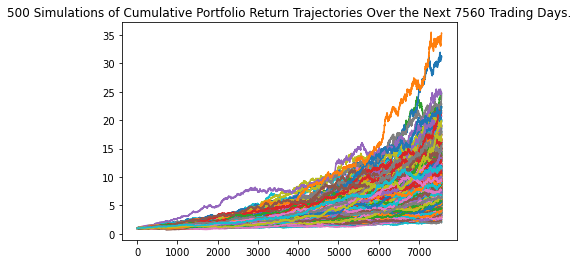

In [26]:
# Plot simulation outcomes
MC_portfolio.plot_simulation();

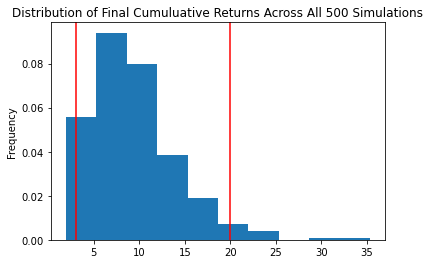

In [24]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution();

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              9.367207
std               4.658094
min               1.938073
25%               5.942457
50%               8.614506
75%              11.777000
max              35.342448
95% CI Lower      3.020369
95% CI Upper     20.010256
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60407.39 and $400205.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90611.08 and $600307.67
